Mounting goole drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

# **Data Preparation**

Use this code to scrape images from google in a txt file.

In [0]:
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
folder = 'apple'
file = 'apple.txt'

In [0]:
folder = 'orange'
file = 'orange.txt'

In [0]:
folder = 'kiwi'
file = 'kiwi.txt'

In [0]:
folder = 'peach'
file = 'peach.txt'

In [0]:
path = Path('gdrive/My Drive/fastai-v3/fruits')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path

PosixPath('gdrive/My Drive/fastai-v3/fruits')

In [0]:
classes = ['apple', 'orange', 'kiwi', 'peach']

download images from the text files which scraped images. 

In [0]:
download_images(path/folder/file, dest, max_pics=300)

# **DataBunch**

Creating an image databunch with batchsize of 16

In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.25, size=224, bs=16).normalize(imagenet_stats)

In [16]:
len(data.train_ds)

240

In [17]:
len(data.valid_ds)

80

In [18]:
len(data.classes), data.c

(4, 4)

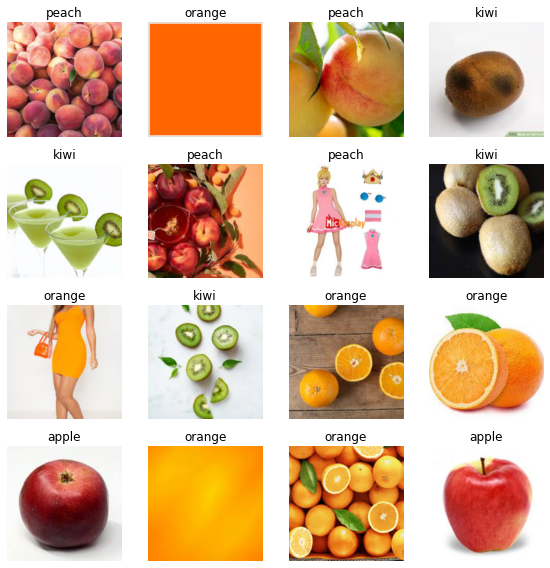

In [19]:
data.show_batch(row=5, figsize=(8, 8))

Creating the Learner object to fit the model

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])

## **Training**

In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.766105,0.464003,0.800000,0.200000,00:07
1,0.994134,0.418848,0.862500,0.137500,00:05
2,0.669230,0.459440,0.850000,0.150000,00:05
3,0.495558,0.362872,0.912500,0.087500,00:05
4,0.384269,0.355871,0.900000,0.100000,00:05
5,0.317160,0.299596,0.912500,0.087500,00:05
6,0.263339,0.270850,0.925000,0.075000,00:05
7,0.212061,0.239230,0.925000,0.075000,00:05
8,0.163895,0.247267,0.925000,0.075000,00:05
9,0.132746,0.250866,0.925000,0.075000,00:05


In [0]:
learn.save('stage-1')

Unfreeze the learner object to be able to train rest of the layers as well

In [0]:
learn.unfreeze()

In [28]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple,apple,apple,apple,apple
Path: gdrive/My Drive/fastai-v3/fruits;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
peach,kiwi,peach,orange,apple
Path: gdrive/My Drive/fastai-v3/fruits;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

Finding the learning rate

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


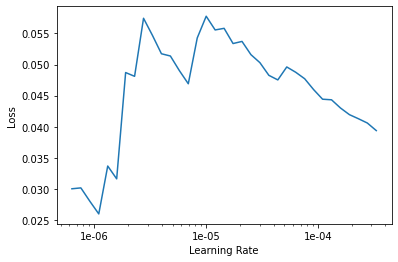

In [30]:
learn.recorder.plot()

In [26]:
learn.recorder.plot_lr

<bound method Recorder.plot_lr of Recorder
learn: Learner(data=ImageDataBunch;

Train: LabelList (240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple,apple,apple,apple,apple
Path: gdrive/My Drive/fastai-v3/fruits;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
peach,kiwi,peach,orange,apple
Path: gdrive/My Drive/fastai-v3/fruits;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    

In [39]:
learn.fit_one_cycle(12, slice(5e-05, 4e-05))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.021721,0.414383,0.912500,0.087500,00:06
1,0.028800,0.311940,0.900000,0.100000,00:06
2,0.029359,0.349156,0.900000,0.100000,00:06
3,0.025048,0.263986,0.912500,0.087500,00:06
4,0.019919,0.247124,0.925000,0.075000,00:06
5,0.026477,0.268992,0.912500,0.087500,00:06
6,0.025577,0.307448,0.900000,0.100000,00:06
7,0.029213,0.297957,0.925000,0.075000,00:06
8,0.027624,0.260681,0.925000,0.075000,00:06
9,0.027069,0.233673,0.912500,0.087500,00:06


In [0]:
learn.save('stage-2')

# **Results**

In [42]:
learn.load('stage-2')
interpt = ClassificationInterpretation.from_learner(learn)

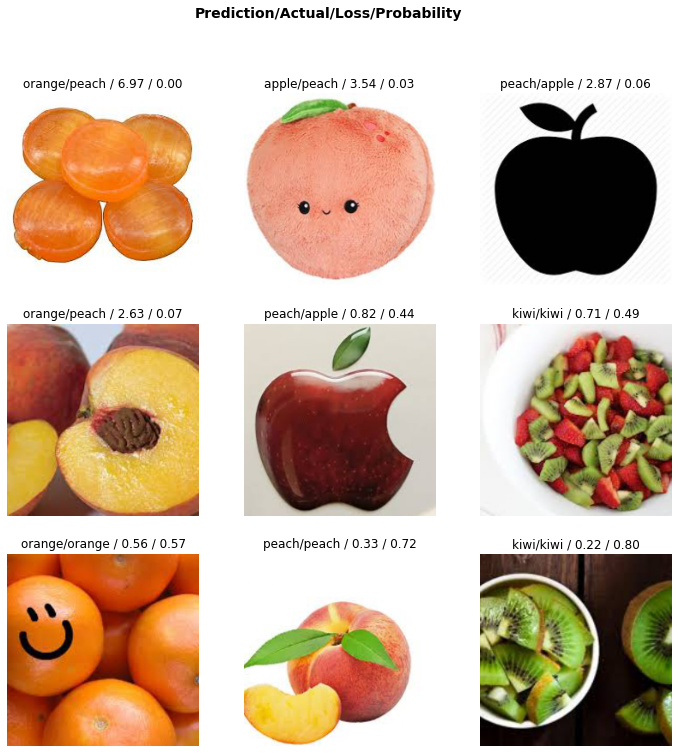

In [50]:
interpt.plot_top_losses(9)

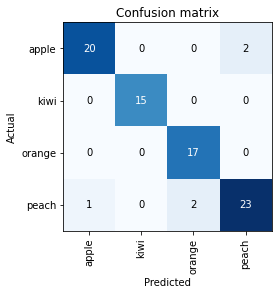

In [44]:
interpt.plot_confusion_matrix()

In [47]:
interpt.most_confused(min_val=2)

[('apple', 'peach', 2), ('peach', 'orange', 2)]

In [0]:
learn.export('fruits.pkl')

In [0]:
learn.export()

In [52]:
path

PosixPath('gdrive/My Drive/fastai-v3/fruits')

# **Image Prediction**

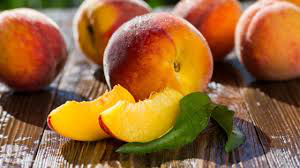

In [57]:
image_to_pred = open_image(path/'peach/00000077.jpg')
image_to_pred

In [0]:
learn = load_learner(path)

In [0]:
preds, y_true, indx = learn.predict(image_to_pred) 

In [72]:
preds

Category peach

In [73]:
y_true

tensor(3)

In [74]:
indx

tensor([0.1325, 0.0024, 0.0230, 0.8421])